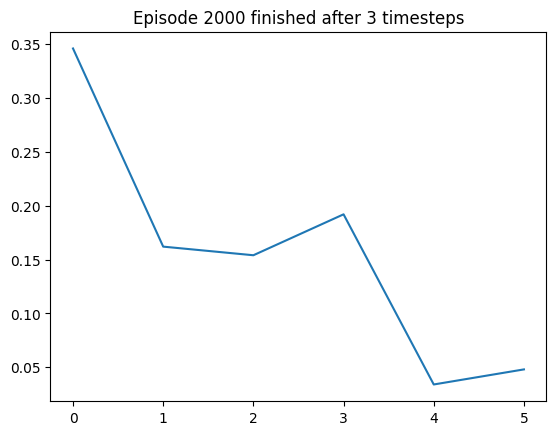

Episode 2000 finished after 3 timesteps
Average reward: 0.048


KeyboardInterrupt: 

In [3]:
import sys
from hex.hex_env import HexEnv
from hex.q_engine import QEngine
from hex.qmodels.conv_qmodel import ConvQModel
from hex.qmodels.simple_qmodel import SimpleQModel
from hex.transformers.conv_transformer import ConvTransfomer
from hex.transformers.simple_transformer import SimpleTransfomer

BOARD_SIZE = 5

env = HexEnv(5,
             # transformer=ConvTransfomer()
             transformer=SimpleTransfomer()
             )
env.reset()

q_learner = QEngine(env,
                    # ConvQModel(env.dim_input(), env.dim_output())
                    SimpleQModel(env.dim_input(), env.dim_output())
                    )
q_learner.learn(batch_size=64,
                num_episodes=sys.maxsize,
                eps_start=0.1,
                eps_end=0.1,
                eps_decay=1,
                gamma=1,
                # target_net_update_rate=0.001,
                # soft_update=True,
                soft_update=False,
                target_net_update_rate=100,
                learning_rate=0.003,
                eval_every=400,
                save_every=200,
                random_start=True,
                self_play=False,
                start_from_model="models/model.pt",
                evaluate_runs=1000
                )

In [ ]:
import os
import torch

# load newest model from models folder
q_learner.model.load_model("models/model.pt")


def machine(board, action_set):
    board = env.transformer.transform_board(env, env.engine, board)
    board = torch.tensor(board, dtype=torch.float32, device=q_learner.device).unsqueeze(0)
    action_set = [env.engine.coordinate_to_scalar(x) for x in action_set]
    return env.engine.scalar_to_coordinates(q_learner._eps_greedy_action(board, 0, action_set))


env.engine.reset()
env.engine.machine_vs_machine(machine, None)